
<img align="left" style="padding-right:100px;" src="http://pvexpect.com/Driftsledelse/Dagligvarer/nmbu.png">

  **Digital Driftsledelse - IND210**

 Jesper Ørntoft Frausig, 2021


#Øvelse - Ord antal og histogrammer

**[Introduksjon](#Introduksjon)**
- [Trin 1](#Trin_1) - Installere pandas
- [Trin 2](#Trin_2) - Initialisere pytrends
- [Trin 3](#Trin_3) - Opprett liste med ord
- [Trin 4](#Trin_4) - Kjør funksjonen gtrends
- [Trin 5](#Trin_5) - Sjekk længden av listen
- [Trin 6](#Trin_6)  - Les maks 4 ord
- [Trin 7](#Trin_7) - Forberede pytrends parametere
- [Trin 8](#Trin_8) - Eksekvere funksjon
- [Trin 9](#Trin_9) - Fjerne kolonner
- [Trin 10](#Trin_10) - Sammenkoble til eksisterende data
- [Trin 11](#Trin_11) - Teller økes med 4
- [Trin 12](#Trin_12) - Håndtere datoer


**[Hva har jeg lært](#lærdom)**

**[Begreber](#Begreber)**


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

<a name="Introduksjon"></a>

#**Introduksjon**

Vi henter trends for ord hos Google Trends og lagrer i en database


> Hva vil lære i følgende øvelse:
* [ ] Hvordan du installere pandas 
* [ ] Hvordan du initialisere pytrends 
* [ ] Hvordan du kjøre funksjoner 
* [ ] Hvordan du   
* [ ] Hvordan du sjekker længden av lister 
* [ ] Hvordan du anvende et udsnit av en list 
* [ ] Hvordan du angiver parameter til en funksjon 
* [ ] Hvordan du sammenkobler datasett





<a name="Trin_1"></a>


##**Trin 1** - Installere pytrends


Først installeres pytrends (Sjekk vennligst [pytrends](#pytrends) )

In [ ]:
!pip install pytrends

<a name="Trin_2"></a>
##**Trin 2** - Initialisere pytrends

Dernest initialiseres pytrends (Sjekk vennligst [pytrends](#pytrends) )


In [ ]:
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
pytrends = TrendReq(hl="en-US", tz=360)

<a name="Trin_3"></a>
##**Trin 3** - Opprett liste med ord

Så angiver vi en liste (Sjekk vennligst [Oppret_liste](#Oppret_liste) )

In [ ]:
trend_list=['Agurk','Paprika','Brokkoli','Blomkål','Hodekål','Kålrot','Kinakål','Rosenkål','Isbergsalat','Purre','Sjampinjong','Banan','Drue','Melon','Kiwi','Ananas','Pære','Appelsin','Jordbær','Blåbær','Bringebær','Fersken']

<a name="Trin_4"></a>
##**Trin 4** - Kjør funksjonen gtrends

Funksjonen `gtrends` forberedes (Sjekk vennligst [definere funksjon](#definere_funksjon) ) .

<a name="Trin_5"></a>
##**Trin 5** - Sjekk længden av listen

Et while loop sjekker længden af ord i listen

<a name="Trin_6"></a>
##**Trin 6** - Les maks 4 ord


Kun 4 ord kan leses av google trend av gangen (Sjekk vennligst [Iterer verdier](#Iterer) ) og tilføj referense ord til listen ved av `append` (Sjekk vennligst [Liste metoder](#Liste_metoder) )





<a name="Trin_7"></a>
##**Trin 7** - Forberede pytrends parametere

Pytrends forberede parameter til hentning av ord (Sjekk vennligst [Forbered pytrends](#Forbered_pytrends) ) .


<a name="Trin_8"></a>
##**Trin 8**  - Eksekvere funksjon


Derefter eksekveres funksjonen for trends over tid (Sjekk vennligst [Eksvere pytrends](#Eksvere_pytrends) ) .



<a name="Trin_9"></a>
##**Trin 9** - Fjerne kolonner 

Vi fjerne unødvendige kolonner (Sjekk vennligst [Fjern kolonner](#Fjern) ) .


`df_time.drop(df_time.columns[len(df_time.columns)-1],axis=1, inplace=True)`

<a name="Trin_10"></a>
##**Trin 10** - Sammenkoble til eksisterende data


Databasen sammenkobles til den eksisterende data (vennligst sjekk [Sammenføre data](#Sammenføre_data) )




<a name="Trin_11"></a>
##**Trin 11** Teller økes med 4


Trends for de neste 4 ord hentes

<a name="Trin_12"></a>
##**Trin 12** - Håndtere datoer

Vi oppretter kolonne til at håndtere datoer (vennligst sjekk [indeks](#indeks) )


In [ ]:
def gtrends_overtime(full_list, key_ref, save_name="", directory="", category=0, time='all', loc=''):
    i = 0
    database=pd.DataFrame()
    while i < len(trend_list):
        l = trend_list[i:(i+4)]
        l.append(key_ref)
        l=[w.replace('_', ' ') for w in l]
        pytrends.build_payload(l, cat=category, timeframe=time, geo=loc, gprop='')
        df_time = pytrends.interest_over_time()
        df_time.drop(df_time.columns[len(df_time.columns)-1],axis=1, inplace=True)
        database=pd.concat([database,df_time],join="outer", axis=1)      
        i += 4
    return database
data=gtrends_overtime(trend_list, "Pizza", "_worldwide_",directory="",  category=71, time='today 5-y', loc="NO")
data['date']=data.index
data

,Agurk,Paprika,Brokkoli,Blomkål,Pizza,Hodekål,Kålrot,Kinakål,Rosenkål,Pizza,Isbergsalat,Purre,Sjampinjong,Banan,Pizza,Drue,Melon,Kiwi,Ananas,Pizza,Pære,Appelsin,Jordbær,Blåbær,Pizza,Bringebær,Fersken,Pizza,date
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-03-06,2,8,8,5,55,1,3,1,1,55,0,2,0,13,55,1,1,14,1,50,1,10,4,4,55,4,1,55,2016-03-06
2016-03-13,1,6,8,9,48,0,0,0,1,48,0,5,0,7,48,0,2,29,1,43,0,14,4,5,48,3,2,48,2016-03-13
2016-03-20,2,12,6,2,66,1,1,0,6,66,0,2,1,13,66,0,1,55,4,60,2,26,5,4,66,5,1,66,2016-03-20
2016-03-27,1,13,13,3,50,0,1,2,3,50,0,0,0,9,50,0,1,21,2,46,1,10,3,4,50,2,0,50,2016-03-27
2016-04-03,1,3,6,5,48,0,1,0,1,48,0,3,0,9,48,1,2,20,4,44,3,8,12,3,48,4,1,48,2016-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-24,5,8,15,9,72,1,4,0,3,72,0,1,1,20,72,1,1,33,2,65,3,4,3,5,72,5,2,72,2021-01-24
2021-01-31,3,7,13,7,75,2,1,0,1,75,0,1,1,15,75,0,2,32,2,68,1,4,8,5,75,4,1,75,2021-01-31
2021-02-07,2,9,12,9,74,1,2,1,1,74,1,1,0,11,74,0,2,32,2,67,4,5,4,4,74,1,1,74,2021-02-07


In [ ]:
data.to_csv('trends.csv')

Dernest kan vi se data for trends.

In [ ]:

data.replace([np.inf, -np.inf], np.nan)
data=data.dropna()

data = data.loc[:,~data.columns.duplicated()]


labels=list(data.columns.unique().drop(['date']))

import altair as alt

brush_sel = alt.selection(type='interval', encodings=['x'])

nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

lower=alt.Chart(data).transform_fold(labels).mark_line().encode(
    y=alt.Y('value:Q'),
    x='date:T',
    color='key:N'
).properties(width=300,height=300).add_selection(brush_sel)

upper=lower.transform_window(
    rolling_mean='mean(value)',
    frame=[-2, 2]
).mark_bar(opacity=0.9).encode(
    y=alt.Y("value:Q"), #,sort='-y' , stack=None
    x='yearmonth(date):O',
    color='key:N',
    
    tooltip=alt.Tooltip(['key:N','value:N']),
).properties(width=300,height=300).transform_filter(brush_sel)

selectors = alt.Chart(data).transform_fold(labels).mark_point().encode(
    x='value:Q',
    color='key:N',
    opacity=alt.value(0),
).add_selection(
    nearest
)

up=alt.layer(upper)


alt.vconcat(up,lower) #.save("ord.html")

alt.VConcatChart(...)

In [ ]:
data.resample("M").mean().to_csv("month.csv")

Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?

<a name="lærdom"></a>
#**Hva har jeg lært idag?**


> Hva har du lært?
* [x] Hvordan du installere pandas 
* [x] Hvordan du initialisere pytrends 
* [x] Hvordan du kjøre funksjoner 
* [x] Hvordan du   
* [x] Hvordan du sjekker længden av lister 
* [x] Hvordan du anvende et udsnit av en list 
* [x] Hvordan du angiver parameter til en funksjon 
* [x] Hvordan du sammenkobler datasett

Hva vil du lære i morgen?





<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

# **Begreber**




<a name="Oppret_liste"></a>

##**Oppret liste** - `List()'


- `Liste`

Lister brukes til å lagre flere elementer i en variabel.
Hvis vi vil google søkeord for grønnsaker, kan vi lage en liste.
* Listen starter med `[`
* Listen skiller verdier med `,`
* Listen avsluttes med `]`


Listeelementer er ordnet, kan endres og muliggjør dupliserte verdier. Dupliserte verdier er verdier, som er de samme og representeres mer enn en gang.

F.eks. her er en kronologisk tabel med top 1 sange:

| Band            | Sang                   | Top 1 på hitliste |
|-----------------|------------------------|-------------------|
| Aha             | Take on me             | 25 September 2000 |
| U2              | Beautiful day          | 16 October 2000   |
| Backstreet Boys | Shape of my heart      | 30 October 2000   |
| Aha             | Same old brand new you | 20 November 2000  |

I listen med bands er `['Aha', 'U2', 'Backstreet Boys', 'Aha']`, er `Aha` duplisert.


Listeelementer er indeksert, det første elementet er indeksert [0], det andre elementet er indeksert [1], og så videre.


Referanser:
* Python for Finance, Wes McKinney, side 88-89 

Online kilder
*  [w3schools - Lists](https://www.w3schools.com/python/python_lists.asp)



For å holde styr på flere ord, kan vi også lave en list over grønnsaker, frukt og bær.

```
grønnsaker_og_frukt_list=['Agurk','Paprika','Brokkoli','Blomkål','Hodekål','Kålrot','Kinakål','Rosenkål','Isbergsalat','Purre','Sjampinjong','Banan','Drue','Melon','Kiwi','Ananas','Pære','Appelsin','Jordbær','Blåbær','Bringebær','Fersken']
```

Denne liste kan representere produkter i produkt sortimentet vår:

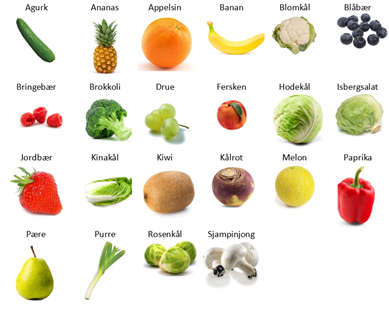


Længden av listen kan ses ved
```
len(grønnsaker_og_frukt_list)
> 22
```
I dette eksempel er længden på listen 22.

Eksempel

Opprettelse av liste

In [ ]:
grønnsaker_og_frukt_list=['Agurk','Paprika','Brokkoli','Blomkål','Hodekål','Kålrot','Kinakål','Rosenkål','Isbergsalat','Purre','Sjampinjong','Banan','Drue','Melon','Kiwi','Ananas','Pære','Appelsin','Jordbær','Blåbær','Bringebær','Fersken']
print(grønnsaker_og_frukt_list)


['Agurk', 'Paprika', 'Brokkoli', 'Blomkål', 'Hodekål', 'Kålrot', 'Kinakål', 'Rosenkål', 'Isbergsalat', 'Purre', 'Sjampinjong', 'Banan', 'Drue', 'Melon', 'Kiwi', 'Ananas', 'Pære', 'Appelsin', 'Jordbær', 'Blåbær', 'Bringebær', 'Fersken']


Lengde på liste

In [ ]:
print(len(grønnsaker_og_frukt_list))

22


Først element i liste

In [ ]:
grønnsaker_og_frukt_list[0]

'Agurk'

> **Spørsmål**
> 
> * Kan du tenke deg tre hverdagseksempler på hva en liste kan brukes til?
> * Hva er indeksen for den første verdien i en liste?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

<a name="pytrends"></a>


**pytrends**

Tillater enkelt grensesnitt for automatisering av nedlasting av rapporter fra Google Trends


!pip install pytrends


title initialisere pytrends
import pandas as pd
import numpy as np
from pytrends.request import TrendReq
pytrends = TrendReq(hl="en-US", tz=360)









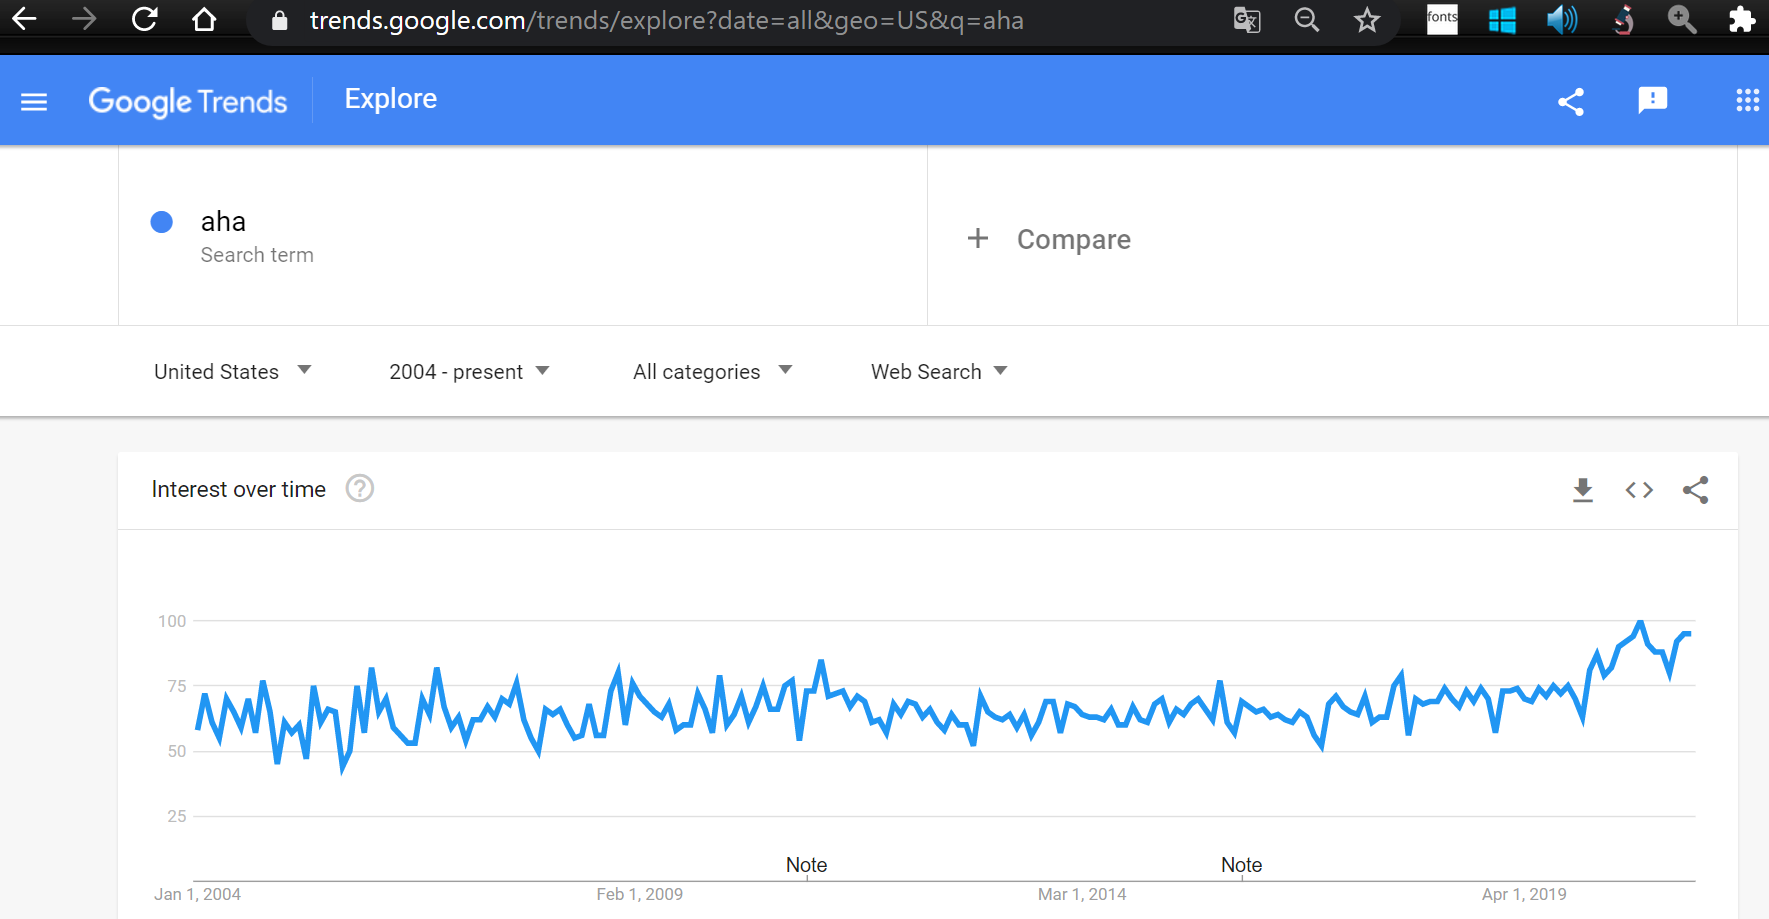

<a name="definere_funksjon"></a>

##**definere funksjon** -  'def funksjon()'



Ovenfor vises en funksjonsdefinisjon som består av følgende komponenter.

* Nølgeord `def` som markerer starten på funksjonsoverskriften.
* Et funksjonsnavn for å identifisere funksjonen unikt. 
* Parametere `(argumenter)` som vi overfører verdier til en funksjon. De er valgfrie.
* Et kolon `:` for å markere slutten på funksjonsoverskriften.
* Valgfri dokumentasjonsstreng (dokstring) for å beskrive hva funksjonen gjør.
* En eller flere gyldige pythonsetninger som utgjør funksjonsdelen. Uttalelser må ha samme innrykkingsnivå med 4 mellomrom eller `tab` på tastaturet.
* En valgfri returoppgave for å returnere en verdi fra funksjonen `return`.



In [ ]:
def giv_epler(antall_epler):
  for eple in range(antall_epler):
    print("Her er "+str(eple+1)+" eple(r)")
  
  print("Du har nå fået "+str(antall_epler)+" eple(r)")

In [ ]:
giv_epler(2)

Her er 1 eple(r)
Her er 2 eple(r)
Du har nå fået 2 eple(r)



> **Spørsmål**
* Hvornår er det verdi at opprette en funksjon?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


<a name="erstatt"></a>
##**Erstatt** - .replace


Metoden replace() returnerer en kopi av strengen der alle forekomster av en understreng erstattes med en annen understreng.

str.replace(tidligere, nytt [, teller]) 


| Variabler | Specificers | Beskrivelse                                                       |
|-----------|-------------|-------------------------------------------------------------------|
| tidligere | Påkrevet    | tidligere string du vil erstatte                                  |
| nytt      | Påkrevet    | nytt string som vil erstatte den tidligere string med             |
| teller    | Valgfri     | antall ganger du vil erstatte den gamle string med den nye string |







<a name="Forbered_pytrends"></a>
##**Forbered pytrends**

Pytrends benytter følgende parameter

'build_payload()'
pytrends.build_payload(l, cat=category, timeframe=time, geo=loc, gprop='')



* cat - kategori

* time - tidshorisont 

* geo - lokasjon

<a name="Eksvere_pytrends"></a>
##**Eksvere pytrends**


Gjentatte oppgaver er modne for automatisering. Det er vanlig at utviklere og systemadministratorer automatiserer rutinemessige oppgaver som kontroller og sikkerhetskopier av filer med skallskript. Når disse oppgavene blir mer komplekse, kan det imidlertid bli vanskeligere å vedlikeholde skallskript.


df_time = pytrends.interest_over_time()


<a name="Fjern"></a>
##**Fjern kolonne pytrends**

Fjerner spesifiserte etiketter fra rader eller kolonner.

Fjern rader eller kolonner ved å spesifisere etikettnavn og tilsvarende akse, eller ved å spesifisere direkte indeks- eller kolonnenavn. Når du bruker en multi-indeks, kan etiketter på forskjellige nivåer fjernes ved å spesifisere nivået.


df_time.drop(df_time.columns[len(df_time.columns)-1],axis=1, inplace=True)

* inplace
* axis
* columns


<a name="Sammenføre_data"></a>

##**Sammenføre data** - `pd.concat`

Kombinering av forskjellige data kilder kan bidrage til nye konklusjoner.

Disse metoder kan være
* enkel sammenkobling av to forskjellige datasett
* kompliserte sammenføyninger av databaser
* sammenslåinger som håndterer korrekt overlapp mellom datasettene riktig. 
Series og DataFrames er forberedt til å håndtere denne typen operasjoner, så dette kan gjøres raskt og korrekt.

En vanlig metode er enkel sammenkobling av Series og DataFrames med
`pd.concat-funksjon`

Pandaobjekter kan sammenkobles langs en bestemt akse med en spesifiseret logiske operasjoenr.
Dertil kan også foretages hierarkisk indeksering på sammenkoblingsaksen.





Andre metoder er `pd.merge()` og `pd.join()`



For eksempel_
`database=pd.concat([database,df_time],join="outer", axis=1)  `



Referense:
* [pd.concat](https://pandas.pydata.org/docs/user_guide/merging.html)





I dette eksempel, sammenføres kommuner:

In [ ]:
import pandas as pd
ser1 = pd.Series(['Halden', 'Moss', 'Sarpsborg'], index=[1, 2, 3])
ser2 = pd.Series(['Frederikstad', 'Hvaler', 'Aremark'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1          Halden
2            Moss
3       Sarpsborg
4    Frederikstad
5          Hvaler
6         Aremark
dtype: object

<br></br>
> **Spørsmål**
> * Hvorfor må sammenkobling av ulike datasett spesifiseres for å fungere?
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>


<a name="Iterer"></a>

##**Iterer over verdier**



En variabler og oppdragsoperatøren =. En variabel er et navn gitt til et objekt, slik at vi kan referere til det ved hjelp av det navnet. Den grunnleggende formen er.
F.eks.
`i += 4`

Ved å endre verdien på en variabel slik at den øker, kalles å *øke en variabel*. Når variabelen synker, bruker vi i stedet *variabel reduksjon*.




##**Kjør funksjon**

En funksjon er en blokk med kode som bare kjører når den kalles.

Du kan overføre data, kjent som parametere, til en funksjon.

En funksjon kan returnere data som et resultat.


gtrends_overtime(trend_list, "Pizza", "_worldwide_",directory="",  category=71, time='today 5-y', loc="NO")



<a name="indeks"></a>
##**Angiv indeks**
data['date']=data.index


Sett DataFrame-indeksen ved hjelp av eksisterende kolonner (av riktig lengde)

<a name="Liste_metoder"></a>

##**Liste metoder**

En rekke metoder kan vendes på lister:

| Metode           | På norsk  | Argumenter            | Beskrivelse                                                                                                                                                      |
|------------------|-----------|-----------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| l[i]=x           |  erstatt         | [i]                   | Erstatter i-element med x                                                                                                                                        |
| l [i: j: k] = s  |  erstatt flere         | [i: j: k]             | Erstatter hvert k-element fra i til j - 1 med s                                                                                                                  |
| append           | vedlegg   | append(x)             | Legger  x til listen                                                                                                                                 |
| count            | teller    | count(x)              | Antall forekomster av objektet xFTP                                                                                                                                 |
| del l [i: j: k]  | slett     | [i: j: k]             | Sletter elementer med indeksverdier i til j - 1                                                                                                                  |
| extend           | udvide    | extend(s)             | Sletter elementer med indeksverdier i til j - 1                                                                                                                  |
| index            | indeks    | index(x [, i [, j]])  | Første indeks for x mellom elementene i og j - 1                                                                                                                 |
| insert           | sett in   | insert(i, x)          | Setter inn x ved / før indeks i|
| remove           | fjern     | remove(i)             | Fjern element med indeks i                                                                                                                                       |
| pop              | fjerner o | pop(i)                | Fjerner elementet med indeks i og returnerer det. Forskjellen mellom `pop` og `del` er å `pop` returner den slettet verdien. |
| reverse          | omvendt   | reverse([liste])      | Vender rekkefølge på alle elementene                                                                                                                             |
| sorter           | sorter    | ([cmp[,key[,reverse]] | Sorterer alle elementene ifølge nøgle                                                                                                                            |




#Midlertidig


##**filføj verdi** - append(key_ref)



##**iterere over verdier verdi**
l=[w.replace('_', ' ') for w in l]
